In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
dataset = pd.read_csv('AirlinesCluster.csv')

In [9]:
dataset.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [10]:
dataset.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [11]:
dataset.isnull().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

Since the dataset is of different scales. Standardizing the dataset is essential , 
as the K-means and Hierarchical clustering depend on calculating distances between the observations.

In [12]:
#standardize the data to normal distribution
from sklearn import preprocessing
dataset_standardized = preprocessing.scale(dataset)
dataset_standardized = pd.DataFrame(dataset_standardized)

# Elbow curve -  To determine the value of K

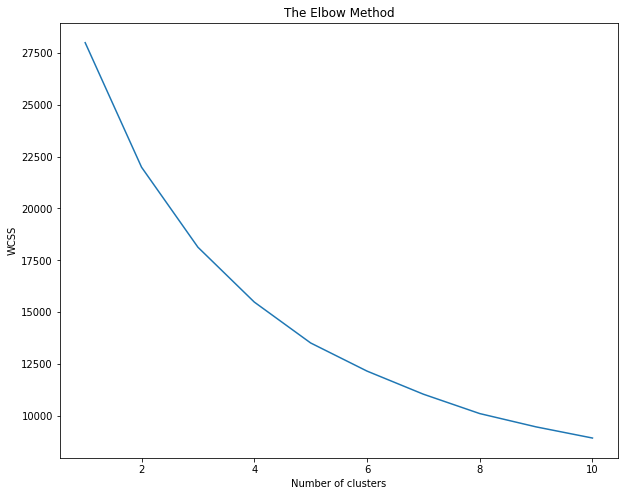

In [13]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K Means Clustering

In [14]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
dataset['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,38071.4,34.4,6731.6,7.6,179.2,0.6,2285.1
2,57778.8,54.9,8827.8,9.2,214.5,0.6,5824.9
3,114012.2,5543.3,19196.7,12.3,939.8,2.8,3872.2
4,191736.3,471.6,33093.3,28.4,5763.1,16.8,4666.4
5,153292.5,78.7,51298.1,21.3,481.6,1.5,4911.3


1. Cluster 5 is set of the recently acquired customer group as the Days since enrollment is lowest , moreover their flight transactions in last 12 months as well as the qualified miles for top class travel is the lowest.

2. Cluster 4 is high vintage customers their number of flight miles and flight transactions in last 12 months is high.

3. Cluster 3 are the oldest customer group,however thier flight miles and flight transactions in last 12 months is very low. They may churn unless some intervention is done.

4. Cluster 2 is also high vintage customers,thier bonusmiles are pretty high. We must come up with offers in a way to increase their flight transactions so that they can redeem these points.

In [15]:
dataset.head(15)

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
0,28143,0,174,1,0,0,7000,2
1,19244,0,215,2,0,0,6968,2
2,41354,0,4123,4,0,0,7034,2
3,14776,0,500,1,0,0,6952,2
4,97752,0,43300,26,2077,4,6935,5
5,16420,0,0,0,0,0,6942,2
6,84914,0,27482,25,0,0,6994,5
7,20856,0,5250,4,250,1,6938,2
8,443003,0,1753,43,3850,12,6948,4
9,104860,0,28426,28,1150,3,6931,5


In [16]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

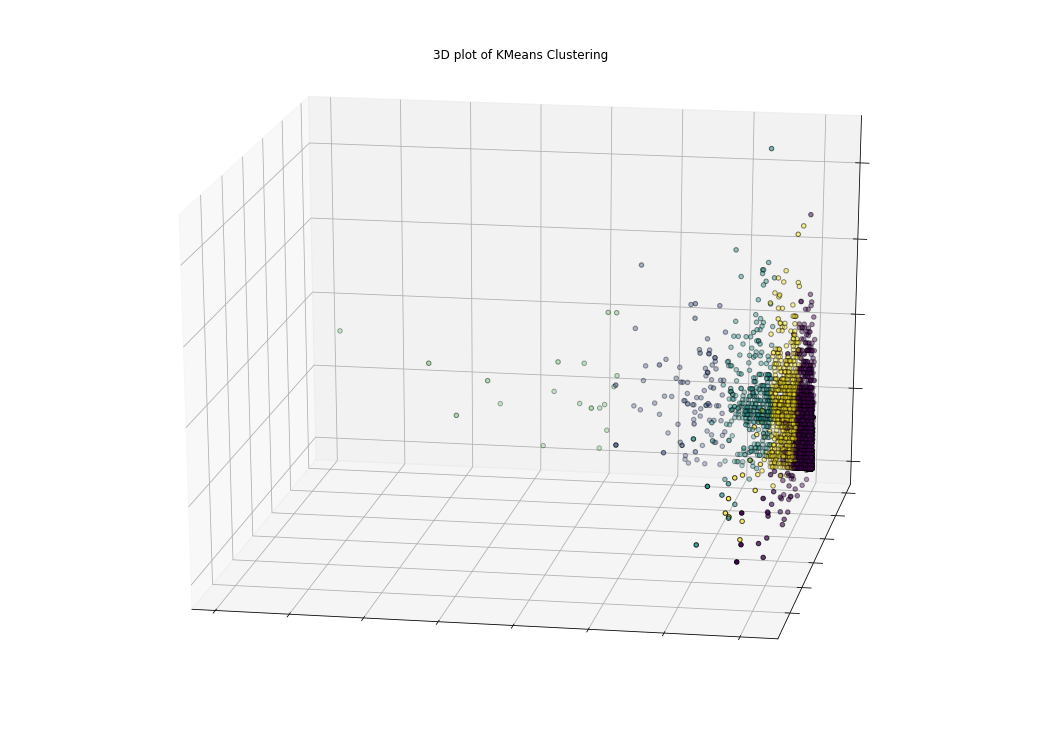

In [17]:
fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(dataset)
labels = kmeans.labels_
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('3D plot of KMeans Clustering')


## Hierarchical Clustering

In [18]:
# creating a dataset for hierarchical clustering
dataset2_standardized = dataset_standardized

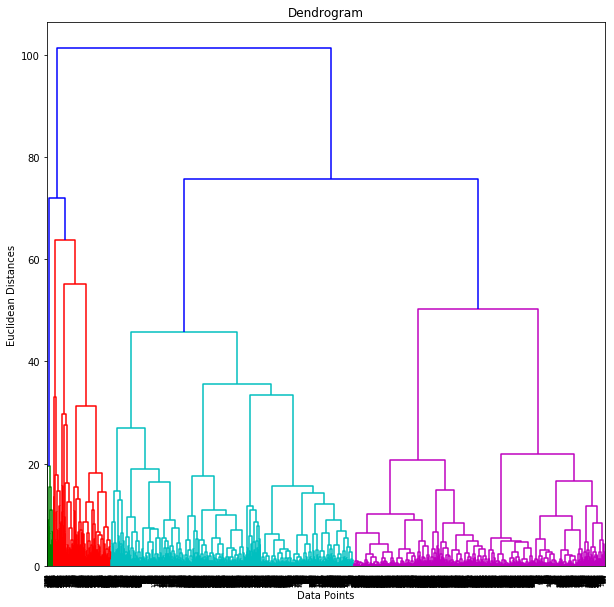

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(dataset2_standardized, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [21]:
H_cluster = linkage(dataset2_standardized,'ward')

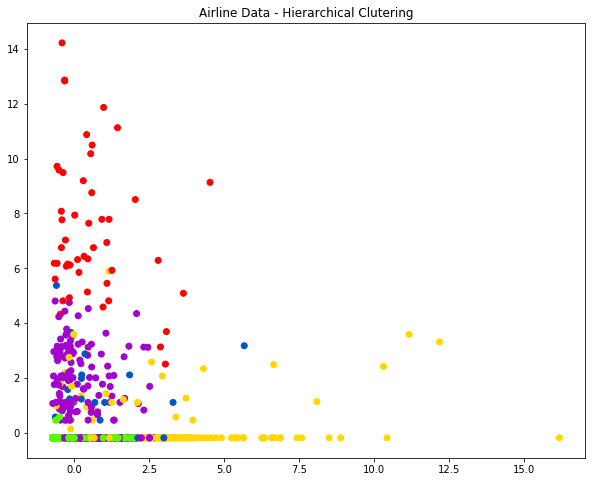

In [22]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(dataset2_standardized.iloc[:,0], dataset2_standardized.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Airline Data - Hierarchical Clutering')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(dataset2_standardized)

In [24]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset2=dataset
dataset2['cluster'] = cluster_Hierarchical
dataset2.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
0,28143,0,174,1,0,0,7000,5
1,19244,0,215,2,0,0,6968,5
2,41354,0,4123,4,0,0,7034,5
3,14776,0,500,1,0,0,6952,5
4,97752,0,43300,26,2077,4,6935,3


In [25]:
#Mean of clusters
cluster_Hierarchical1  = pd.DataFrame(round(dataset2.groupby('cluster').mean(),1))
cluster_Hierarchical1 

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,135318.0,5870.1,16406.0,12.6,974.8,3.3,4320.4
2,154830.6,490.7,32137.0,33.5,8752.6,23.7,4046.8
3,204316.2,144.7,36265.0,19.8,2286.7,6.7,4744.2
4,79910.0,123.7,26735.2,16.8,148.7,0.5,4727.5
5,37353.1,0.9,3651.9,4.2,137.5,0.5,3403.0
